In [166]:
import pandas as pd

In [167]:
df = pd.read_csv("dataset/refined.tsv", sep="\t")

In [168]:
df

,atua_como,bool_cert,provedor,maior_desafio,tam_equipe,avaliacao,porte,tam_investimento,posicao,segmentacao,...,bool_alt_custo,bool_alt_tec,bool_falha_gov,bool_falha_dev,bool_falha_aus_info,bool_falha_pln_custo,bool_falha_gst_lid,bool_falha_usu,qt_alteracoes,qt_falhas
0,Terceiro,1,AWS,Variedade,"[0,5]",5,"]500,+∞]","[0,10]",Dev,B2B,...,0,0,0,0,0,0,0,0,2,0
1,Terceiro,1,AWS,Velocidade,"]10,20]",4,"]100,500]",NaN,Gestão,B2B,...,0,0,0,1,0,1,0,0,0,2
2,Interno,1,Azure,Variedade,"]10,20]",3,"]20,50]","]20,30]",Dev,B2ALL,...,1,0,1,0,0,1,1,0,2,3
3,Terceiro,0,AWS,Volume,"]5,10]",5,"[0,20]","]10,20]",Dev,B2B,...,0,1,0,0,0,0,0,0,2,0
4,Interno,1,Azure,Velocidade,"[0,5]",4,"]100,500]","]50,100]",Gestão,B2B,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Interno,1,GCP,Variedade,"]35,+∞]",4,"]500,+∞]","]50,100]",Gestão,B2ALL,...,1,1,0,0,0,1,0,1,3,2
98,Terceiro,0,AWS,Volume,"]10,20]",4,"]500,+∞]","]100,+∞]",Dev,B2B,...,0,0,0,0,0,0,0,0,0,0
99,Interno,1,AWS,Velocidade,"]5,10]",5,"]500,+∞]","]100,+∞]",Gestão,B2ALL,...,0,1,0,0,0,0,0,0,1,0
100,Interno,1,AWS,Velocidade,"]5,10]",3,"]100,500]","]100,+∞]",Dev,B2B,...,0,1,0,1,0,0,0,0,1,1


In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

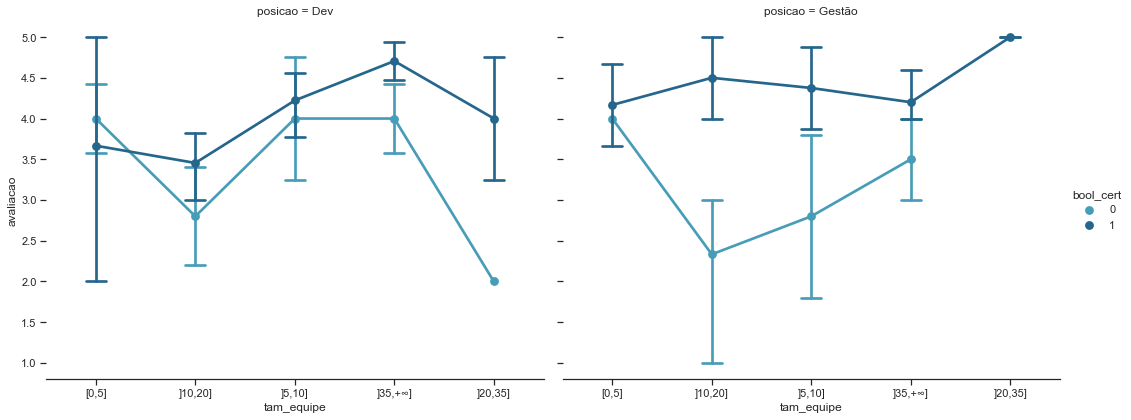

In [170]:
g = sns.catplot(x="tam_equipe", y="avaliacao", hue="bool_cert", col="posicao",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=1.25,
                kind="point", data=df)
g.despine(left=True)

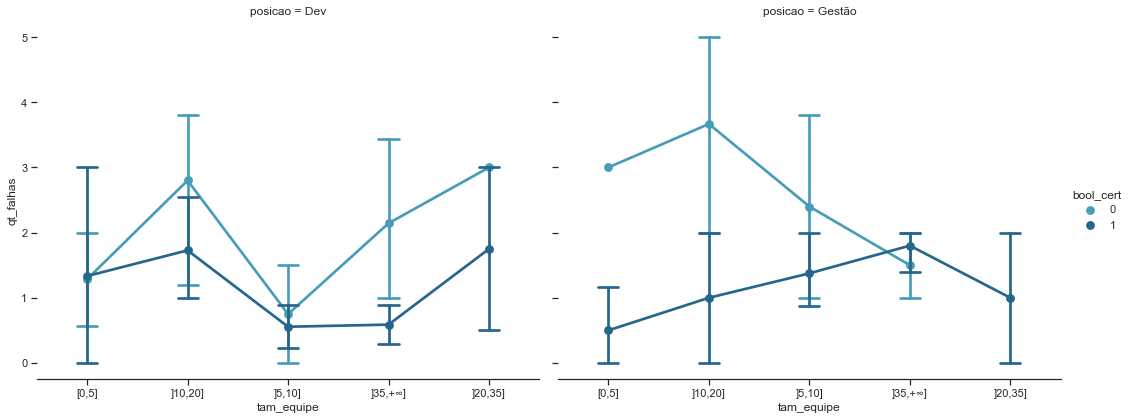

In [171]:
g = sns.catplot(x="tam_equipe", y="qt_falhas", hue="bool_cert", col="posicao",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=1.25,
                kind="point", data=df)
g.despine(left=True)

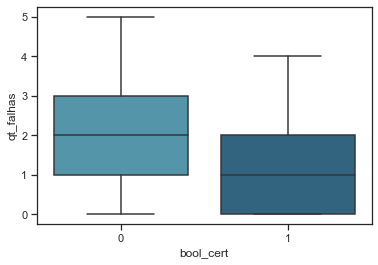

In [172]:
g = sns.boxplot(x="bool_cert", y="qt_falhas", palette="YlGnBu_d", data=df)

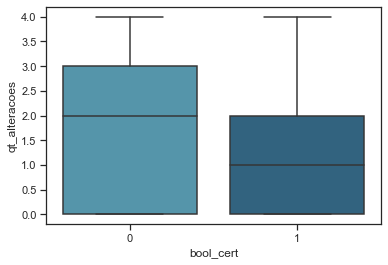

In [173]:
g = sns.boxplot(x="bool_cert", y="qt_alteracoes", palette="YlGnBu_d", data=df)

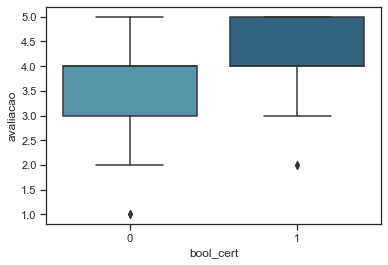

In [174]:
g = sns.boxplot(x="bool_cert", y="avaliacao", palette="YlGnBu_d", data=df)

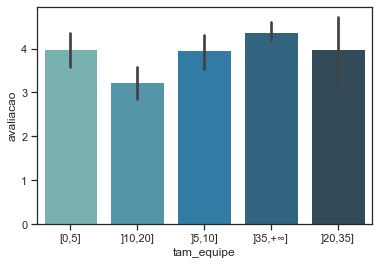

In [175]:
g = sns.barplot(x="tam_equipe", y="avaliacao", palette="YlGnBu_d", data=df)

In [176]:
from scipy import stats

In [177]:
certificado = list(df.query("bool_cert == 1")["avaliacao"])
nao_certificado = list(df.query("bool_cert == 0")["avaliacao"])

In [178]:
t_value,p_value = stats.ttest_ind(certificado,nao_certificado)

In [179]:
t_value

4.426563413593539

In [180]:
round(p_value,7)

2.45e-05

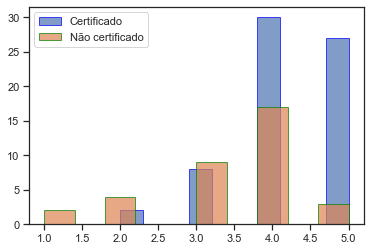

In [181]:
# plotting first histogram
plt.hist(certificado, label='Certificado', alpha=.7, edgecolor='blue')
  
# plotting second histogram
plt.hist(nao_certificado, label='Não certificado', alpha=0.7, edgecolor='green')
plt.legend()
  
# Showing the plot using plt.show()
plt.show()

In [18]:
certificado = list(df.query("bool_cert == 1")["qt_falhas"])
nao_certificado = list(df.query("bool_cert == 0")["qt_falhas"])

In [19]:
t_value,p_value = stats.ttest_ind(certificado,nao_certificado)

In [20]:
t_value

-3.8645546629183123

In [21]:
p_value

0.0001979069782280366

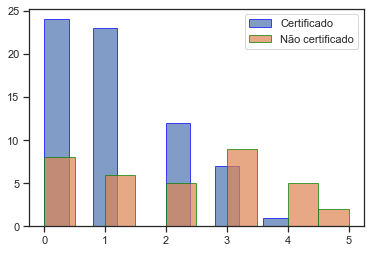

In [22]:
# plotting first histogram
plt.hist(certificado, label='Certificado', alpha=.7, edgecolor='blue')
  
# plotting second histogram
plt.hist(nao_certificado, label='Não certificado', alpha=0.7, edgecolor='green')
plt.legend()
  
# Showing the plot using plt.show()
plt.show()

In [23]:
certificado = list(df.query("bool_cert == 1")["qt_alteracoes"])
nao_certificado = list(df.query("bool_cert == 0")["qt_alteracoes"])

In [24]:
t_value,p_value = stats.ttest_ind(certificado,nao_certificado)

In [25]:
t_value

-1.7567946930826068

In [26]:
p_value

0.08201374171596225

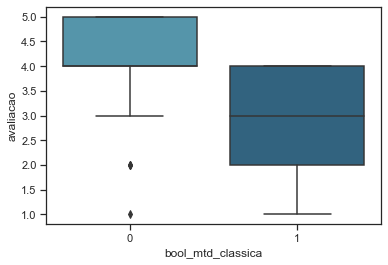

In [27]:
g = sns.boxplot(x="bool_mtd_classica", y="avaliacao", palette="YlGnBu_d", data=df)

In [182]:
# teste jp

In [183]:
def p_value_from_t_test(column: str, metric_column: str) -> str:
    g1 = list(df.query(f"{column} == 1")[metric_column])
    g2 = list(df.query(f"{column} == 0")[metric_column])
    return "{:.8f}".format(float(stats.ttest_ind(g1,g2)[1])) # p_value

In [184]:
bool_columns = [col for col in df.columns if "bool" in col]

In [185]:
metrics = ["avaliacao", "qt_falhas", "qt_alteracoes"]

In [186]:
p_dataset = []

for col in bool_columns:
    p_dataset.append([col] + [p_value_from_t_test(col, metric) for metric in metrics])

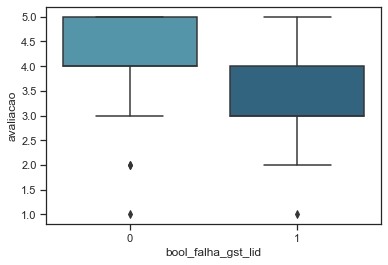

In [43]:
g = sns.boxplot(x="bool_falha_gst_lid", y="avaliacao", palette="YlGnBu_d", data=df)

In [187]:
pd.MultiIndex.from_product([["p_value"], ["column"] + metrics])

MultiIndex([('p_value',        'column'),
            ('p_value',     'avaliacao'),
            ('p_value',     'qt_falhas'),
            ('p_value', 'qt_alteracoes')],
           )

In [188]:
df_p_values = pd.DataFrame(data=p_dataset, columns=pd.MultiIndex.from_product([["p_value"], ["column"] + metrics]))

In [189]:
def destaca_p_value(x):
    try:
        if float(x) < 0.05:
            return "background-color: #FFDEAD"
    except:
        return None 

In [197]:
df_colorido = df_p_values.style.applymap(destaca_p_value)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_colorido)

In [79]:
fvalue, pvalue = stats.f_oneway(
    df.query("provedor == 'AWS'")["avaliacao"], 
    df.query("provedor == 'GCP'")["avaliacao"],
    df.query("provedor == 'Azure'")["avaliacao"]
)

In [80]:
pvalue

0.367442990861321

In [82]:
fvalue, pvalue = stats.f_oneway(
    df.query("maior_desafio == 'Variedade'")["avaliacao"], 
    df.query("maior_desafio == 'Velocidade'")["avaliacao"],
    df.query("maior_desafio == 'Volume'")["avaliacao"]
)

pvalue

0.0221618080173713

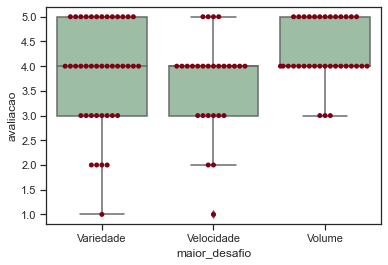

In [83]:
ax = sns.boxplot(x='maior_desafio', y='avaliacao', data=df, color='#99c2a2')
ax = sns.swarmplot(x="maior_desafio", y="avaliacao", data=df, color='#7d0013')
plt.show()

#### Sample description

In [117]:
df.index

RangeIndex(start=0, stop=102, step=1)

In [136]:
stats_list = list()

for column in df.columns:
    for value, count in df.groupby(column).size().iteritems():
        stats_list.append([column, value, count, round((count/102)*100, 2)])

In [159]:
distribuicao = pd.DataFrame(stats_list, columns=["column", "value", "count", "pct"])
distribuicao.head()

,column,value,count,pct
0,atua_como,Interno,69,67.65
1,atua_como,Terceiro,33,32.35
2,bool_cert,0,35,34.31
3,bool_cert,1,67,65.69
4,provedor,AWS,39,38.24


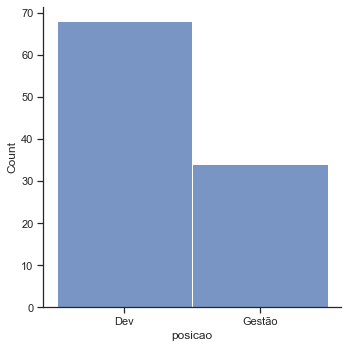

In [158]:
sns.displot(df, x="posicao", bins=5)

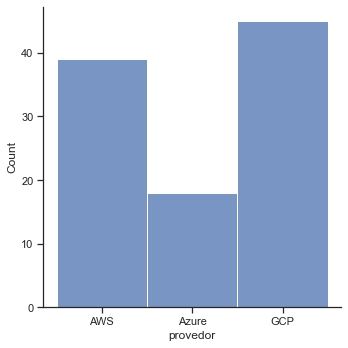

In [157]:
sns.displot(df, x="provedor", bins=5)

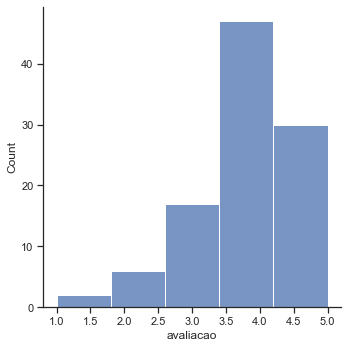

In [156]:
sns.displot(df, x="avaliacao", bins=5)

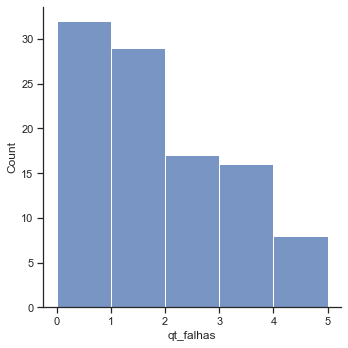

In [154]:
sns.displot(df, x="qt_falhas", bins=5)

In [163]:
distribuicao.to_csv("output/dist.csv", index=False)